# 1_Relay_Control_using_Simpy

In [1]:
import simpy.rt
import sys

sys.path.append("../TCLab")
from TCLab import TCLab

env = simpy.rt.RealtimeEnvironment(strict=False)

a = TCLab()
a.start()

SP = 40.0
def control(env):
    while True:
        a.Q1 = 100 if a.T1 <= SP else 0
        yield env.timeout(1)
         
def reporter(env):
    while True:
        print('{0:7.2f}   {1:7.2f}  {2:7.2f}'.format(env.now, a.Q1, a.T1), flush=True)
        yield env.timeout(5)
        
env.process(control(env))
env.process(reporter(env))
env.run(until=200)

# shutdown heater
a.stop()

Opening connection
TCLab connected via Arduino on port /dev/tty.wchusbserial1410
   0.00      0.00    44.10
   5.00      0.00    44.10
  10.00      0.00    43.46
  15.00      0.00    43.13
  20.00      0.00    42.49
  25.00      0.00    42.17
  30.00      0.00    41.52
  35.00      0.00    41.20
  40.00      0.00    40.88
  45.00      0.00    40.23
  50.00    100.00    39.91
  55.00    100.00    39.59
  60.00    100.00    39.91
  65.00      0.00    40.56
  70.00      0.00    41.20
  75.00      0.00    41.52
  80.00      0.00    41.52
  85.00      0.00    41.85
  90.00      0.00    41.52
  95.00      0.00    41.52
 100.00      0.00    41.20
 105.00      0.00    40.88
 110.00      0.00    40.56
 115.00      0.00    40.23
 120.00      0.00    39.91
 125.00    100.00    39.91
 130.00    100.00    39.91
 135.00      0.00    40.56
 140.00      0.00    41.20
 145.00      0.00    41.20
 150.00      0.00    41.52
 155.00      0.00    41.52
 160.00      0.00    41.20
 165.00      0.00    41.20
 

'Sleep'

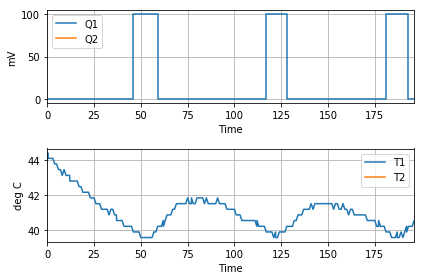

In [2]:
%matplotlib inline
a.plot()